___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#pip uninstall scikit-learn --yes

In [3]:
#pip install scikit-learn==1.2.2

In [4]:
import sklearn

sklearn.__version__

'1.2.2'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [5]:
#Load Dataset
df_Male = pd.read_csv("ANSUR II MALE Public.csv" , encoding="ISO-8859-1")
df_Female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")
pd.set_option('display.max_columns',None)#To print all columns

## Explore Data

In [6]:
df_Male.head(3)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand


In [7]:
df_Female.head(3)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand


In [8]:
# Create a single dataframe
df = pd.concat([df_Male, df_Female], axis=0, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,

In [9]:
df.shape

(6068, 109)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 109 entries, subjectid to SubjectId
dtypes: float64(2), int64(98), object(9)
memory usage: 5.0+ MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.000,20003.371,6568.435,10027.000,14270.250,17236.500,27315.750,29452.000
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
...,...,...,...,...,...,...,...,...
DODRace,6068.000,1.615,0.979,1.000,1.000,1.000,2.000,8.000
Age,6068.000,29.761,8.675,17.000,23.000,28.000,36.000,58.000
Heightin,6068.000,68.257,3.862,56.000,66.000,68.000,71.000,94.000
Weightlbs,6068.000,174.750,33.692,0.000,150.000,173.000,196.000,321.000


In [12]:
df.describe(include="O").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [13]:
#Check missing value
df.isnull().values.sum()

10715

In [14]:
#Check duplicates
df.duplicated().sum()

0

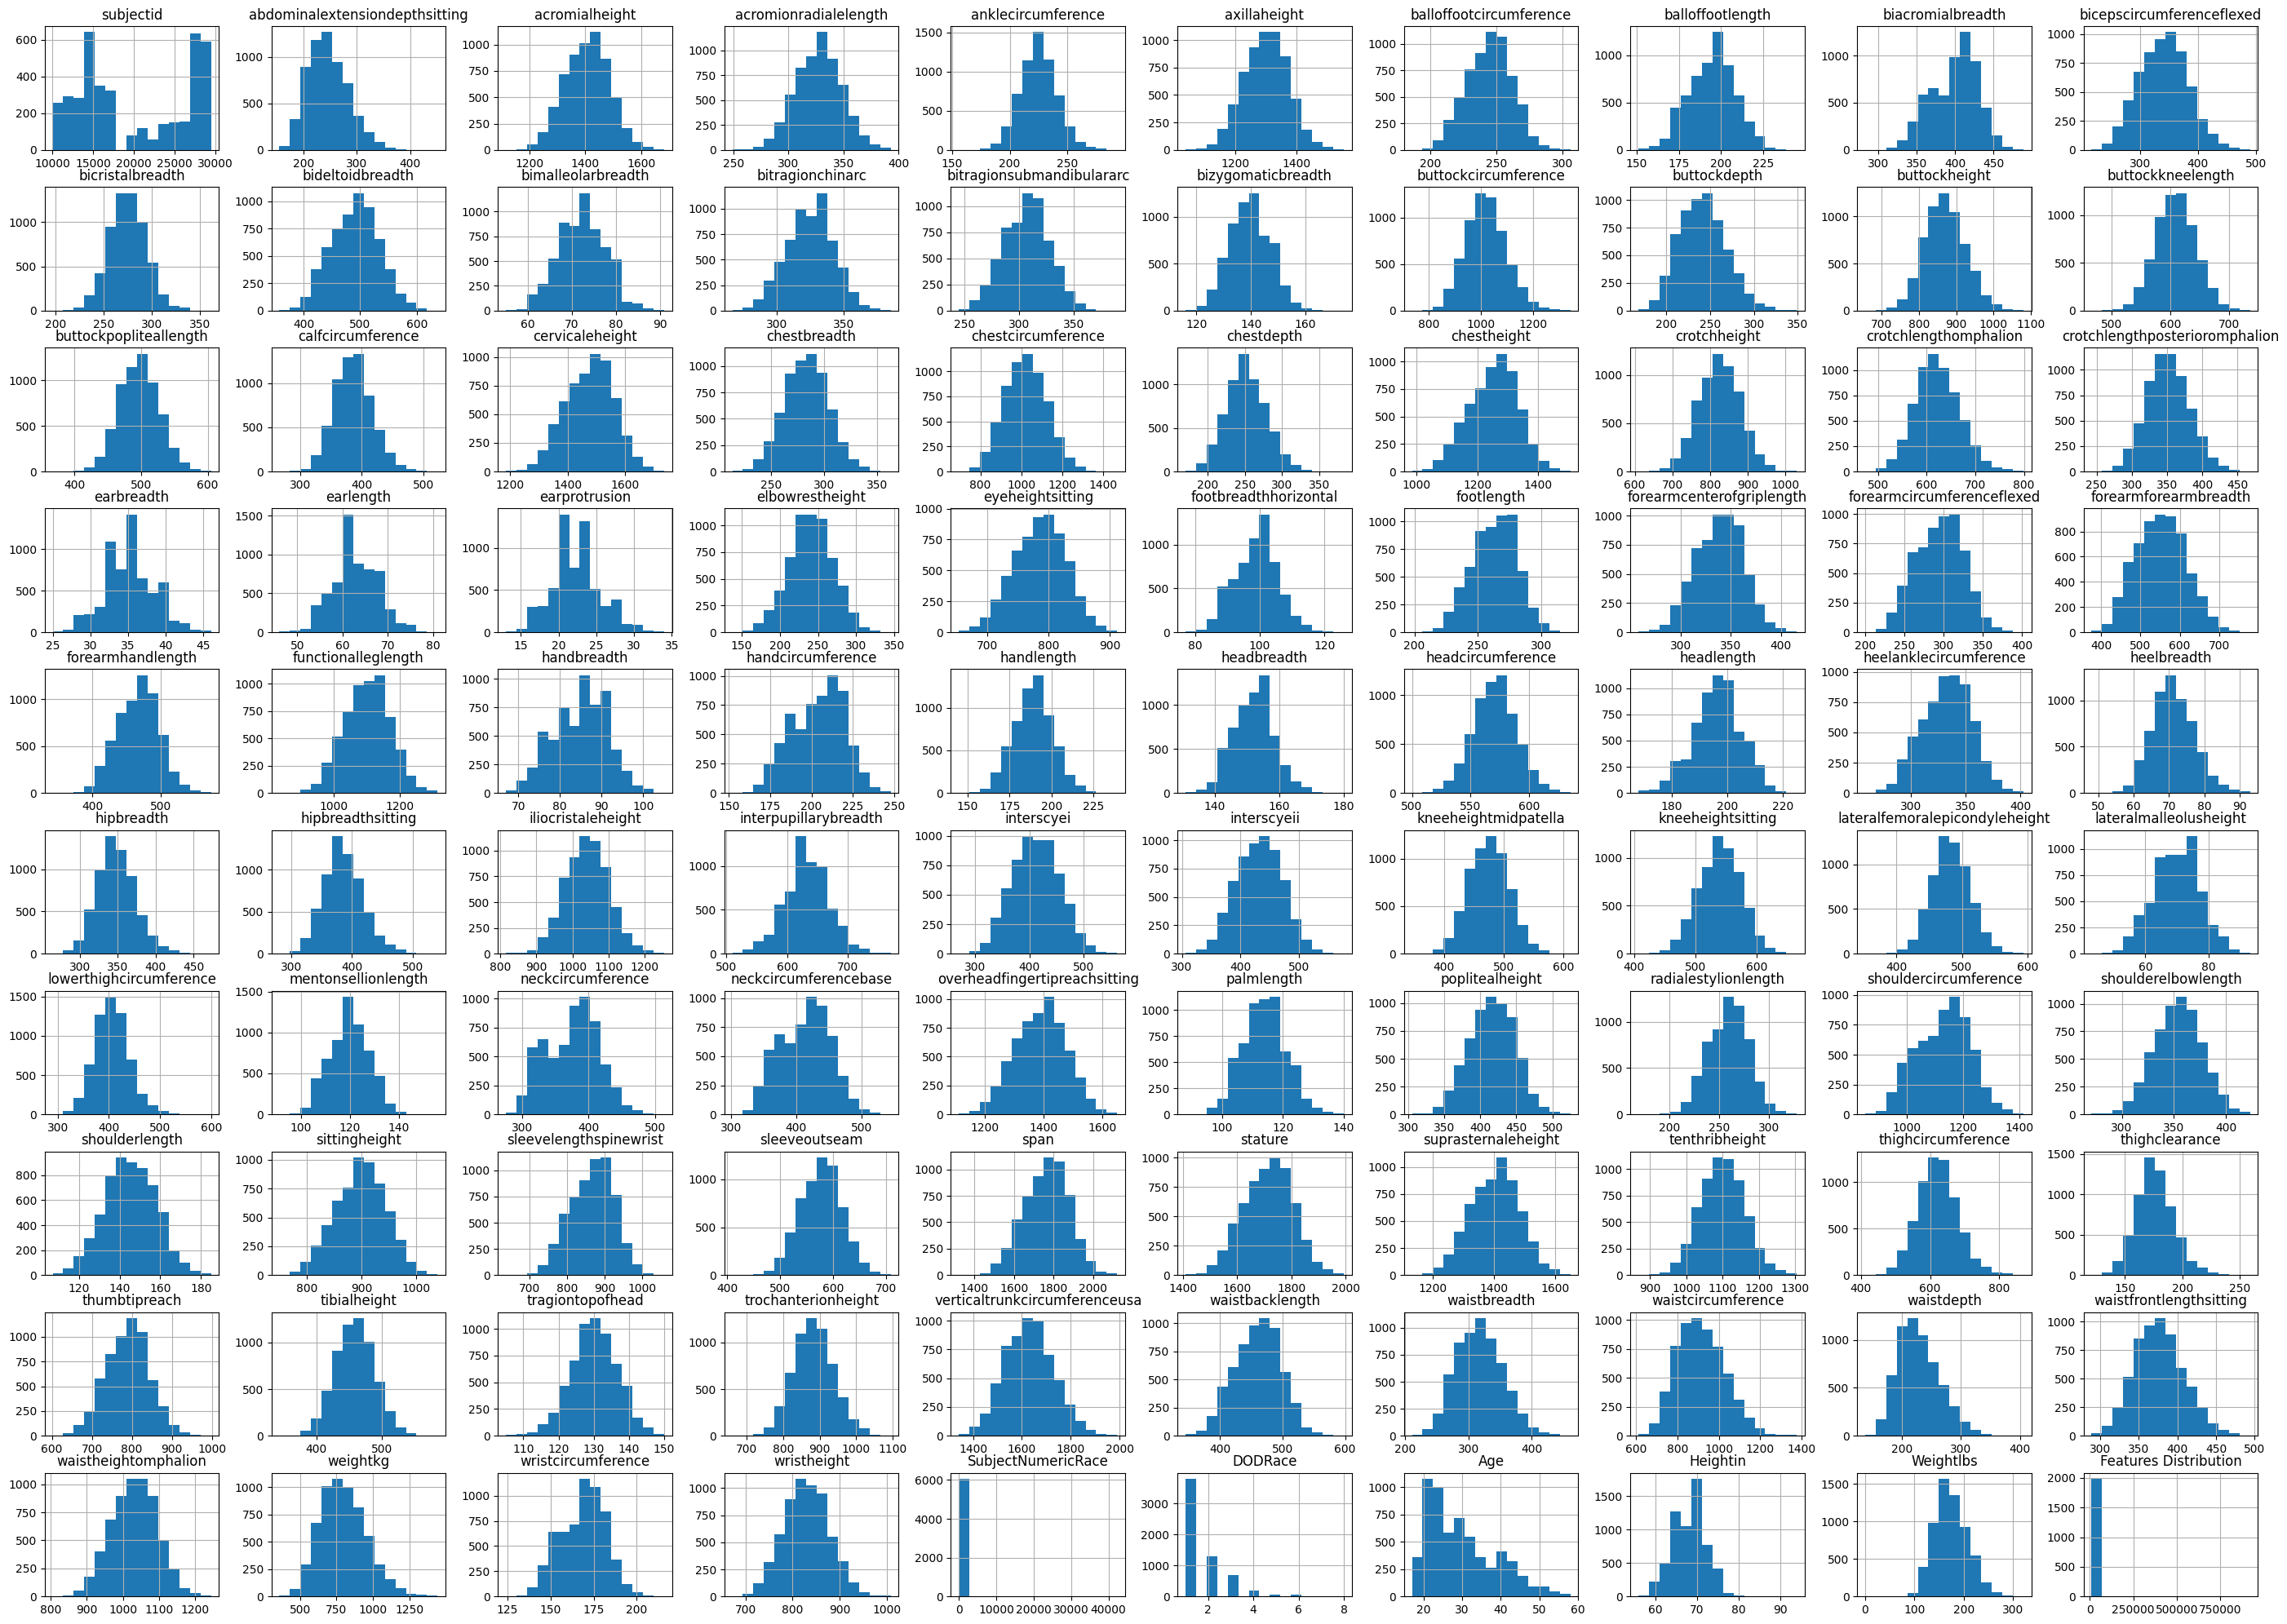

In [15]:
# Check the distribution of all the features
df.hist(figsize=(35,25),bins = 15)
plt.title("Features Distribution")
plt.show()

In [16]:
# Drop ID number and Date Because it does not affect the model
# SubjectId for Female , subjectid for Male
df= df.drop(["subjectid",
             "SubjectId",
             "Date",
             "Component",
             "Branch",
             "Weightlbs",
             "Heightin",
             "Installation",
             "Ethnicity",
             "PrimaryMOS",
             "SubjectNumericRace"
            ], axis=1)
# Drop Weightlbs because it was measured in “weightkg”
# Drop Heightin because it was measured in “stature”
# installation where the measurement occurred and we do not need it
#Drop "Ethnicity" because many missing values
#Drop "PrimaryMOS", "SubjectsBirthLocation" becuase have many unique values
#Drop "SubjectNumericRace" it may mislead the conclusion [It is similar to the target]
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,2,21,Right hand


In [17]:
#check again for missing value
df.isnull().values.sum()

0

In [18]:
df.shape

(6068, 98)

In [19]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

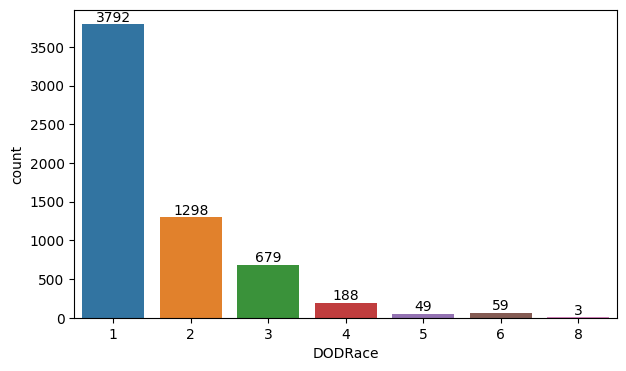

In [20]:
# Check distribution of target class
ax = sns.countplot(x='DODRace', data=df)
ax.bar_label(ax.containers[0]);

In [21]:
# Just DODRace with > 500 observations
df = df.query("DODRace in [1, 2, 3]")
df.groupby("DODRace").count()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
DODRace,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792
2,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
3,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679


In [22]:
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)
df["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

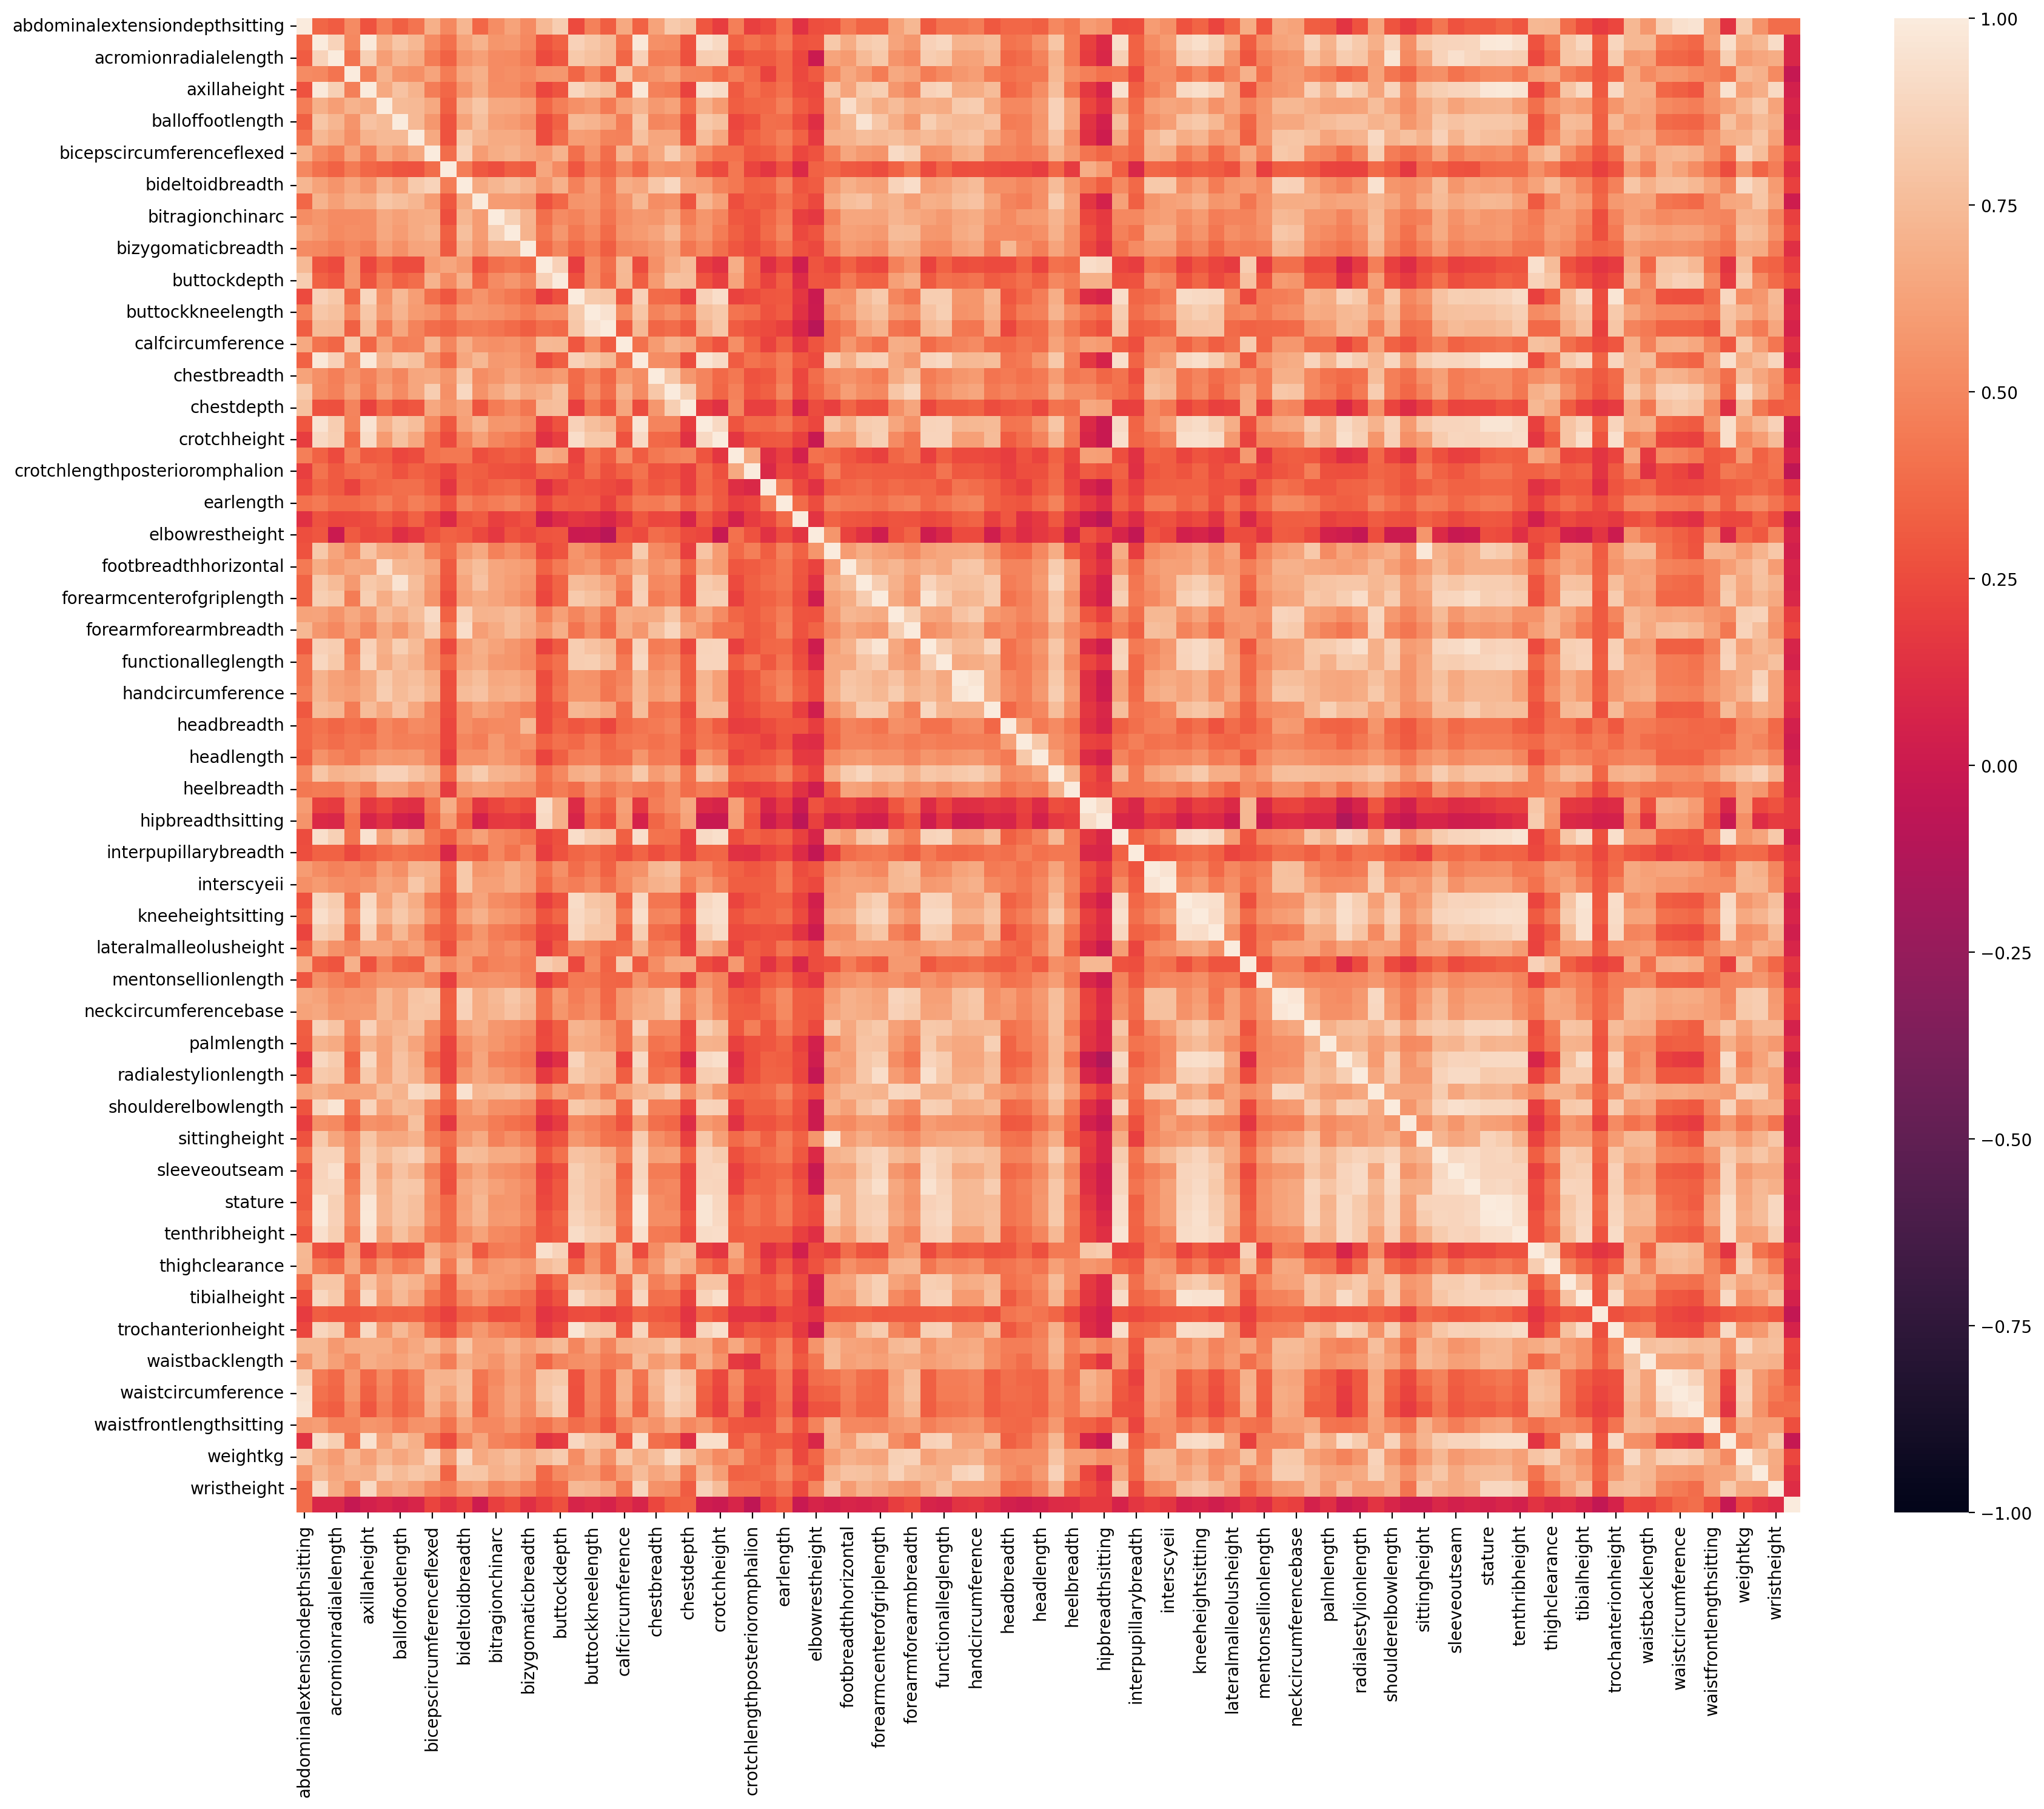

In [23]:
plt.figure(figsize=(20,16), dpi=200)
sns.heatmap(df.corr(), vmin=-1, vmax=1);

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [24]:
X = df.drop(["DODRace"], axis = 1)
y = df["DODRace"]

In [25]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [26]:
cat_onehot = X_train.select_dtypes("object").columns
cat_onehot

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [27]:
# Encode nominal categorical features
# OneHotEncoder converts categorical features into dummies 0 and
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans_OneHotEncoder = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                            remainder=MinMaxScaler(),verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline



lr = LogisticRegression(class_weight="balanced" , max_iter=10000, random_state=101)

operations = [("encoder", column_trans_OneHotEncoder), ("logistic", lr)]

pipe_lr_model = Pipeline(steps=operations)

pipe_lr_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [129]:
from sklearn.metrics import confusion_matrix, classification_report
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [30]:
eval_metric(pipe_lr_model, X_train, y_train, X_test, y_test)
# 'white':1, 'black':2, 'hispanic': 3

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  57  362 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



### Cross validation

In [31]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])


scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [32]:
from sklearn.model_selection import cross_val_score, cross_validate
operations = [("encoder", column_trans_OneHotEncoder), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()

fit_time                   1.625
score_time                 0.037
test_f1_hispanic           0.599
train_f1_hispanic          0.652
test_precision_hispanic    0.490
train_precision_hispanic   0.533
test_recall_hispanic       0.773
train_recall_hispanic      0.839
dtype: float64

### Logistic Model GridsearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

operations = [("encoder", column_trans_OneHotEncoder),
              ("logistic", lr)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    'logistic__C': [0.5, 1],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear', 'lbfgs']
}

grid_lr_search = GridSearchCV(pipe_model, param_grid, cv=10, scoring=recall_hispanic, return_train_score=True)
grid_lr_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             param_grid={'logistic__C': [0.5, 1],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [34]:
grid_lr_search.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [35]:
pd.DataFrame(grid_lr_search.cv_results_).loc[grid_lr_search.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.773
mean_train_score   0.839
Name: 7, dtype: object

In [36]:
eval_metric(grid_lr_search, X_train, y_train, X_test, y_test)
# 'white':1, 'black':2, 'hispanic': 3

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  57  362 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [37]:
!pip install scikit-plot

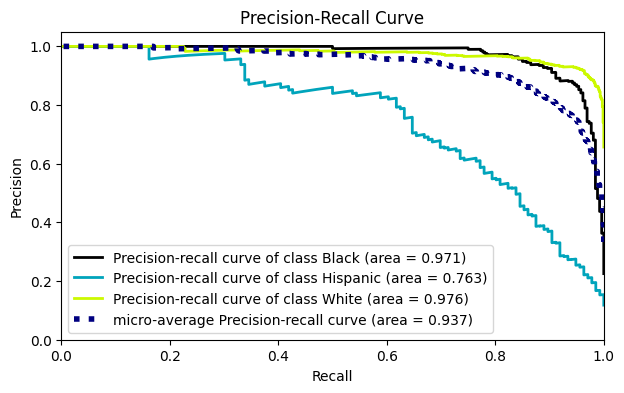

In [38]:
from scikitplot.metrics import plot_roc, plot_precision_recall
lr = LogisticRegression(class_weight="balanced" , max_iter=10000, random_state=101)
operations = [("encoder", column_trans_OneHotEncoder),
              ("logistic", lr)]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

y_pred_proba = pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [161]:
#Save scoring in variables
y_pred = grid_lr_search.predict(X_test)
logistic_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
logistic_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model

In [39]:
from sklearn.svm import SVC

In [40]:
operations_SVC = [("encoder", column_trans_OneHotEncoder),
              ("SVC", SVC(class_weight="balanced", random_state=101))]

SVM_model = Pipeline(steps=operations_SVC)
SVM_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('SVC', SVC(class_weight='balanced', random_state=101))])

In [41]:
eval_metric(SVM_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [42]:
scores = cross_validate(SVM_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.565
train_f1_hispanic          0.622
test_precision_hispanic    0.451
train_precision_hispanic   0.495
test_recall_hispanic       0.760
train_recall_hispanic      0.835
dtype: float64

###  SVC Model GridsearchCV

In [43]:
param_grid = {'SVC__C': [0.5, 1],
              'SVC__gamma':["scale", "auto", 0.01]
              #'SVC__kernel': ['rbf', 'linear']
             }

In [44]:
operations_SVC = [("encoder", column_trans_OneHotEncoder),
              ("SVC", SVC(class_weight="balanced", random_state=101))]
SVM_model = Pipeline(steps=operations_SVC)

SVM_model_grid = GridSearchCV(SVM_model,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=10,
                              return_train_score=True
                              )
SVM_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.5, 1],
                         'SVC__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [45]:
SVM_model_grid.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('SVC', SVC(C=1, class_weight='balanced', random_state=101))])

In [46]:
pd.DataFrame(SVM_model_grid.cv_results_).loc[SVM_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.760
mean_train_score   0.835
Name: 3, dtype: object

In [47]:
eval_metric(SVM_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



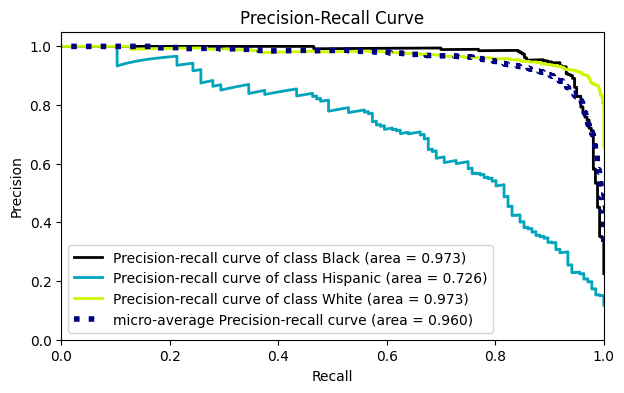

In [48]:
operations_SVC = [("encoder", column_trans_OneHotEncoder),
              ("SVM", SVC(C=1, class_weight="balanced", random_state=101,probability=True))]

SVC_model = Pipeline(steps=operations_SVC)
SVC_model.fit(X_train, y_train)

y_pred_proba = SVC_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [162]:
y_pred = SVM_model_grid.predict(X_test)
SVC_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
SVC_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [49]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_onehot),
                            remainder='passthrough',verbose_feature_names_out=False)

column_trans_OrdinalEncoder=column_trans.set_output(transform="pandas")

In [50]:
from sklearn.ensemble import RandomForestClassifier


operations_RF = [("encoder", column_trans_OrdinalEncoder),
              ("RF", RandomForestClassifier(class_weight="balanced", random_state=101))]

RF_model = Pipeline(steps=operations_RF)

RF_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [51]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[191   0  69]
 [ 10   6 120]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.91      0.73      0.81       260
    Hispanic       0.75      0.04      0.08       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.82      0.59      0.59      1154
weighted avg       0.82      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [52]:
operations_RF = [("encoder", column_trans_OrdinalEncoder),
              ("RF", RandomForestClassifier(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations_RF)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10 ,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()



fit_time                   2.374
score_time                 0.041
test_f1_hispanic           0.052
train_f1_hispanic          1.000
test_precision_hispanic    0.653
train_precision_hispanic   1.000
test_recall_hispanic       0.028
train_recall_hispanic      1.000
dtype: float64

### RF Model GridsearchCV

In [53]:
param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

In [54]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations_RF = [("encoder", column_trans_OrdinalEncoder),
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations_RF)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [55]:
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [56]:
rf_grid_model.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=4, max_samples=0.8,
                                        min_samples_leaf=2, n_estimators=50,
                                        random_state=101))])

In [57]:
rf_grid_model.best_score_

0.6408766564729867

In [58]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[149  66  45]
 [ 10  85  41]
 [ 74 301 383]]
              precision    recall  f1-score   support

       Black       0.64      0.57      0.60       260
    Hispanic       0.19      0.62      0.29       136
       White       0.82      0.51      0.62       758

    accuracy                           0.53      1154
   macro avg       0.55      0.57      0.51      1154
weighted avg       0.70      0.53      0.58      1154


Train_Set
[[ 631  268  139]
 [  47  364  132]
 [ 202 1316 1516]]
              precision    recall  f1-score   support

       Black       0.72      0.61      0.66      1038
    Hispanic       0.19      0.67      0.29       543
       White       0.85      0.50      0.63      3034

    accuracy                           0.54      4615
   macro avg       0.58      0.59      0.53      4615
weighted avg       0.74      0.54      0.60      4615



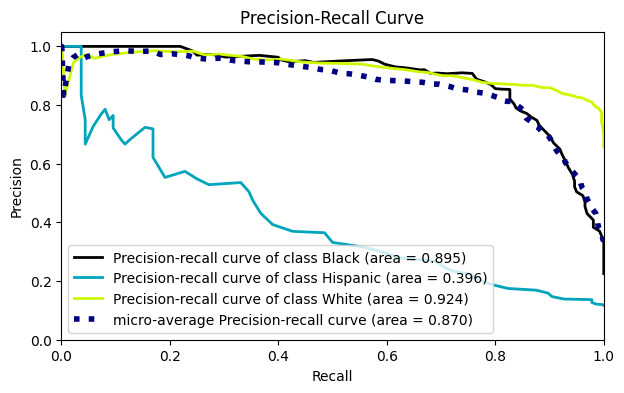

In [59]:
operations_RF = [("encoder", column_trans_OrdinalEncoder),
              ("RF", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations_RF)
pipe_model.fit(X_train, y_train)

y_pred_proba = pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [165]:
y_pred = rf_grid_model.predict(X_test)
RF_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
RF_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [60]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
# To avoid error, the target column should have numerical values
y_train_XGB = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_train_XGB

938     1
206     2
3996    2
3360    2
4714    0
       ..
4766    1
1542    2
3987    2
4643    0
1816    2
Name: DODRace, Length: 4615, dtype: int64

In [61]:
y_test_XGB = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_XGB

2103    2
4240    2
5850    2
3981    2
692     1
       ..
2654    2
950     2
4637    2
5554    2
4012    1
Name: DODRace, Length: 1154, dtype: int64

In [62]:
from xgboost import XGBClassifier
operations_xgb = [("encoder", column_trans_OrdinalEncoder),
              ("XGB_model", XGBClassifier(random_state=101))]

pipe_XGB_model = Pipeline(steps=operations_xgb)
pipe_XGB_model.fit(X_train, y_train_XGB)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [63]:
eval_metric(pipe_XGB_model, X_train, y_train_XGB, X_test, y_test_XGB)

Test_Set
[[224   2  34]
 [ 11  53  72]
 [ 17  11 730]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       260
           1       0.80      0.39      0.52       136
           2       0.87      0.96      0.92       758

    accuracy                           0.87      1154
   macro avg       0.86      0.74      0.77      1154
weighted avg       0.87      0.87      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [64]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_XGB
)
pipe_XGB_model.fit(X_train, y_train_XGB, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [65]:
eval_metric(pipe_XGB_model, X_train, y_train_XGB, X_test, y_test_XGB)

Test_Set
[[235   3  22]
 [ 10  63  63]
 [ 21  20 717]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       260
           1       0.73      0.46      0.57       136
           2       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [66]:
scoring_XGB = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}


In [67]:
operations_xgb = [
    ("encoder", column_trans_OrdinalEncoder),
    ("XGB_model", XGBClassifier(random_state=101)),
]

XGB_model = Pipeline(steps=operations_xgb)
scores = cross_validate(XGB_model ,
                        X_train,
                       y_train_XGB,
                        scoring=scoring_XGB,
                        cv=10,
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight": classes_weights},
                        )
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()

fit_time                   4.012
score_time                 0.021
test_precision_Hispanic    0.703
train_precision_Hispanic   1.000
test_recall_Hispanic       0.438
train_recall_Hispanic      1.000
test_f1_Hispanic           0.538
train_f1_Hispanic          1.000
dtype: float64

### XGBoost Model GridsearchCV

In [68]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [69]:
operations_xgb = [
    ("encoder", column_trans_OrdinalEncoder),
    ("XGB_model", XGBClassifier(random_state=101)),
]

grid_model = Pipeline(steps=operations_xgb)

XGB_grid_model = GridSearchCV(
    grid_model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [70]:
XGB_grid_model.fit(X_train, y_train_XGB, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBClassifier(base_score=No...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [71]:
XGB_grid_model.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=40, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [72]:
XGB_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [73]:
pd.DataFrame(XGB_grid_model.cv_results_).loc[XGB_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.564
mean_train_score   0.644
Name: 15, dtype: object

In [74]:
XGB_grid_model.best_score_

0.5635406048250086

In [75]:
eval_metric(XGB_grid_model, X_train, y_train_XGB, X_test, y_test_XGB)

Test_Set
[[199  40  21]
 [ 18  76  42]
 [ 93 167 498]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       260
           1       0.27      0.56      0.36       136
           2       0.89      0.66      0.76       758

    accuracy                           0.67      1154
   macro avg       0.60      0.66      0.61      1154
weighted avg       0.76      0.67      0.70      1154


Train_Set
[[ 803  143   92]
 [  63  347  133]
 [ 269  644 2121]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1038
           1       0.31      0.64      0.41       543
           2       0.90      0.70      0.79      3034

    accuracy                           0.71      4615
   macro avg       0.64      0.70      0.65      4615
weighted avg       0.79      0.71      0.73      4615



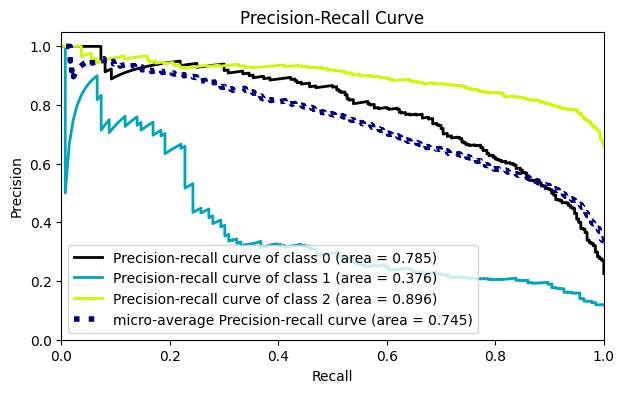

In [76]:
operations_xgb = [
    ("encoder", column_trans_OrdinalEncoder),
    ("XGB_model", XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=40,
            subsample=1,
            random_state=101,)),
]
XGB_model = Pipeline(steps=operations_xgb)

XGB_model.fit(X_train, y_train_XGB, XGB_model__sample_weight=classes_weights)

y_pred_proba = XGB_model.predict_proba(X_test)

plot_precision_recall(y_test_XGB, y_pred_proba)
plt.show()

In [166]:
y_pred = XGB_grid_model.predict(X_test)
XGB_f1 = f1_score(y_test_XGB, y_pred, average=None, labels=[1])
XGB_recall = recall_score(y_test_XGB, y_pred, average=None, labels=[1])

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [77]:
!pip install imblearn

In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

In [82]:
column_trans_OneHotEncoder = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
    remainder=MinMaxScaler(),
)

In [90]:
# don't apply fit_transform to the TEST data.
X_train_encoded = column_trans_OneHotEncoder.fit_transform(X_train)
X_test_encoded = column_trans_OneHotEncoder.transform(X_test)

## Logistic Regression "Over Sampling"
Oversampling methods duplicate or create new synthetic examples in the minority class

In [114]:
# Apply SMOTE to the training set
# SMOTE used to solve the imbalance problem
over = SMOTE()
X_resampled, y_resampled = over.fit_resample(X_train_encoded, y_train)

In [116]:
y_resampled.value_counts()
# all classes after smote are equal

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

In [117]:
# Train a logistic regression model on the resampled training set
lr_resampled_Over = LogisticRegression()
lr_resampled_Over.fit(X_resampled, y_resampled)

LogisticRegression()

In [118]:
def eval_metric_(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_resampled)
    y_pred = model.predict(X_test_encoded)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_resampled, y_train_pred))
    print(classification_report(y_resampled, y_train_pred))

In [119]:
eval_metric_(lr_resampled_Over, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[239  10  11]
 [  4 111  21]
 [ 26  87 645]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.53      0.82      0.65       136
       White       0.95      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[2884   78   72]
 [  86 2625  323]
 [  55  336 2643]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      3034
    Hispanic       0.86      0.87      0.86      3034
       White       0.87      0.87      0.87      3034

    accuracy                           0.90      9102
   macro avg       0.90      0.90      0.90      9102
weighted avg       0.90      0.90      0.90      9102



## Logistic Regression "Under Sampling"
 undersampling methods delete or merge examples in the majority class.


In [120]:
under = RandomUnderSampler()
X_resampled, y_resampled = under.fit_resample(X_train_encoded, y_train)

In [121]:
y_resampled.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [122]:
# Train a logistic regression model on the resampled training set
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [123]:
eval_metric_(lr_resampled_Over, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[239  10  11]
 [  4 111  21]
 [ 26  87 645]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.53      0.82      0.65       136
       White       0.95      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[504  22  17]
 [ 23 447  73]
 [ 14  56 473]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93       543
    Hispanic       0.85      0.82      0.84       543
       White       0.84      0.87      0.86       543

    accuracy                           0.87      1629
   macro avg       0.87      0.87      0.87      1629
weighted avg       0.87      0.87      0.87      1629



### Comparing Models

Text(0.5, 1.0, 'F1 Score Comparison')

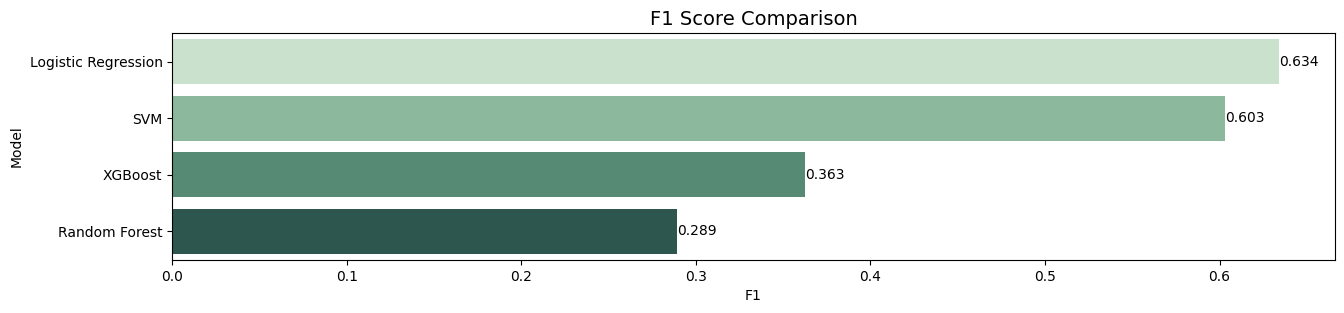

In [169]:
#F1 Score Comparison
#The best model is Logistic Regression
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [logistic_f1[0], SVC_f1[0], RF_f1[0], XGB_f1[0]]
    }
)
plt.figure(figsize=(15, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="ch:2.5,-.2,dark=.3")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title("F1 Score Comparison", size=14)

Text(0.5, 1.0, 'Recall Score Comparison')

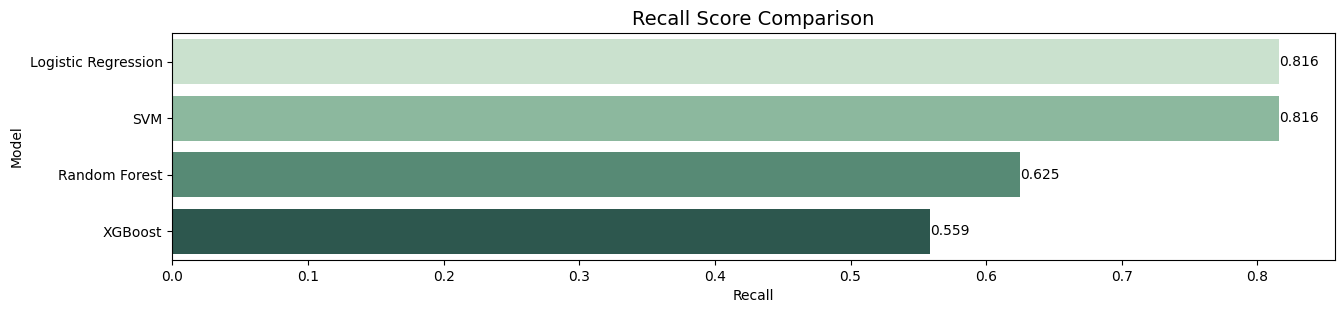

In [170]:
#Recall Score Comparison
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "Recall": [logistic_recall[0], SVC_recall[0], RF_recall[0], XGB_recall[0]]
    }
)
plt.figure(figsize=(15, 10))
plt.subplot(311)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="ch:2.5,-.2,dark=.3")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title("Recall Score Comparison", size=14)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___